In [1]:
# Load libraries
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np


import warnings
warnings.filterwarnings('ignore')


In [2]:
# Define the labels for the sleep health datafile
col_names = ['Gender','Age','Job', 'Sleep', 'Quality', 'Activity', 'Stress', 'Weight', 'Blood', 'BPM', 'Steps','Disorder']

# load dataset
df = pd.read_csv("sleep.health.csv", header = 0, names = col_names)


In [3]:
df.head()

,Gender,Age,Job,Sleep,Quality,Activity,Stress,Weight,Blood,BPM,Steps,Disorder
1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [4]:
df.shape

(374, 12)

In [5]:
df.info

<bound method DataFrame.info of      Gender  Age                   Job  Sleep  Quality  Activity  Stress  \
1      Male   27     Software Engineer    6.1        6        42       6   
2      Male   28                Doctor    6.2        6        60       8   
3      Male   28                Doctor    6.2        6        60       8   
4      Male   28  Sales Representative    5.9        4        30       8   
5      Male   28  Sales Representative    5.9        4        30       8   
..      ...  ...                   ...    ...      ...       ...     ...   
370  Female   59                 Nurse    8.1        9        75       3   
371  Female   59                 Nurse    8.0        9        75       3   
372  Female   59                 Nurse    8.1        9        75       3   
373  Female   59                 Nurse    8.1        9        75       3   
374  Female   59                 Nurse    8.1        9        75       3   

         Weight   Blood  BPM  Steps     Disorder  
1   

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 374 entries, 1 to 374
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Gender    374 non-null    object 
 1   Age       374 non-null    int64  
 2   Job       374 non-null    object 
 3   Sleep     374 non-null    float64
 4   Quality   374 non-null    int64  
 5   Activity  374 non-null    int64  
 6   Stress    374 non-null    int64  
 7   Weight    374 non-null    object 
 8   Blood     374 non-null    object 
 9   BPM       374 non-null    int64  
 10  Steps     374 non-null    int64  
 11  Disorder  155 non-null    object 
dtypes: float64(1), int64(6), object(5)
memory usage: 38.0+ KB


In [7]:
df.describe()

,Age,Sleep,Quality,Activity,Stress,BPM,Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


In [8]:
df.isnull().sum()

Gender        0
Age           0
Job           0
Sleep         0
Quality       0
Activity      0
Stress        0
Weight        0
Blood         0
BPM           0
Steps         0
Disorder    219
dtype: int64

In [9]:
df.duplicated().sum()

242

In [10]:
#The missing values probably mean that the person doesn't have a sickness
#Replace NaN-s with No Disorder
df["Disorder"] = df["Disorder"].fillna("No Disorder")

In [11]:
#Separate the Blood Pressure values to Systolic and Diastolic
df[["Systoli", "Diastolic"]] = df["Blood"].str.split("/", expand = True).astype(int)

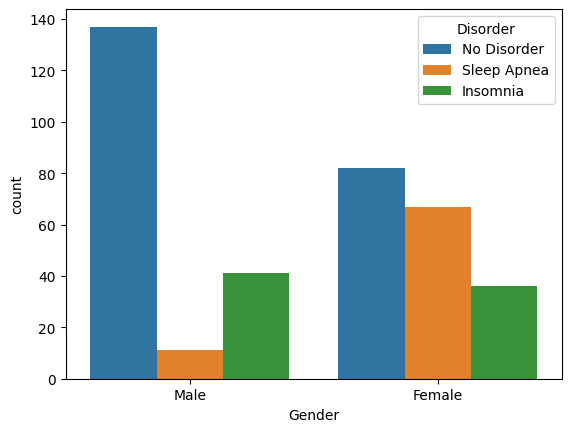

In [12]:
#Sleep disorder based on gender
sns.countplot(x = "Gender", hue = "Disorder", data = df);

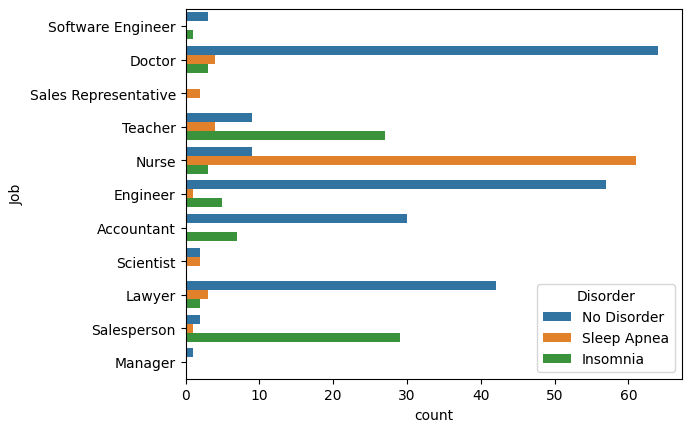

In [13]:
#Sleep disorder based on occupation
sns.countplot(y = "Job", hue = "Disorder", data = df);

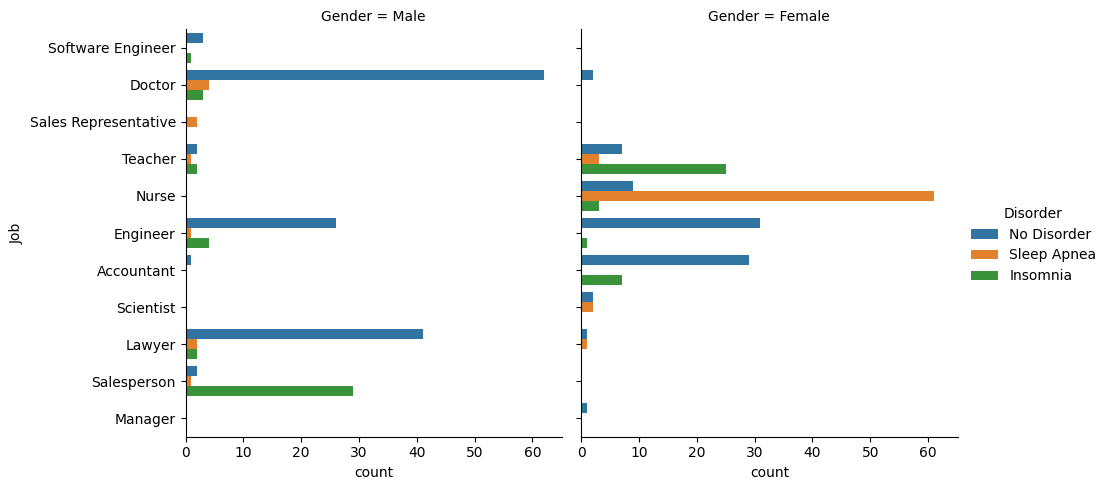

In [14]:
#Let's see, which occupations are more threatened by sleeping disorders based also on gender, to check for imbalances
sns.catplot(y="Job", hue="Disorder",col= "Gender",kind = "count", data=df)
plt.show()

It seems there is a strong cofounding factor of occupation. We can see that jobs which probably pay less, like nurse are done by females
while higher paying jobs. like doctor, by men

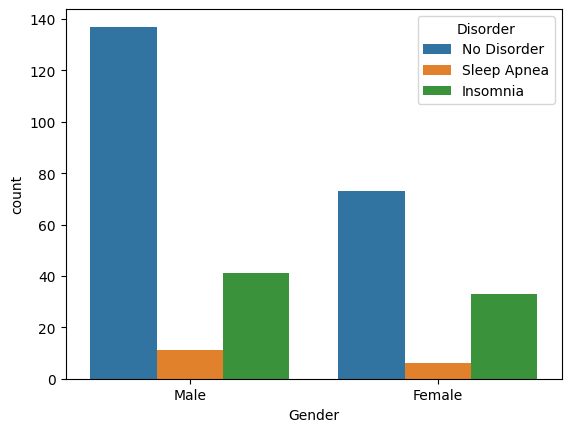

In [15]:
#It seems there is a strong cofounding factor of occupation. We can see that jobs which probably pay less, like nurse are done by females
#while higher paying jobs. like doctor, by men.
#Lets see the distribution in gender if we don't include the nurses
no_nurse = df.loc[df["Job"] != "Nurse"]
sns.countplot(x = "Gender", hue = "Disorder", data = no_nurse);

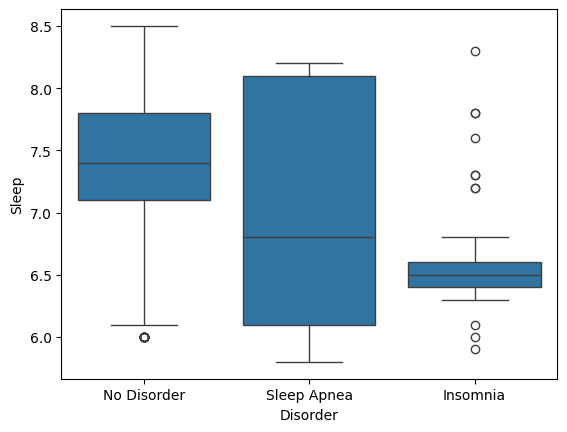

In [16]:
#Create boxplots about the sleep length
sns.boxplot(x = "Disorder",  y = "Sleep", data = df);

In [17]:
#Let's find out if there are some other variables, which are pushing nurses to the direction of sleep apnea
#First make another correlation, but now numeric values for sleep disorders

sleep_dummies = pd.get_dummies(df["Disorder"])
sleep_new = df.drop("Disorder", axis = 1)
sleep_disorders = pd.concat([sleep_new, sleep_dummies], axis = 1)

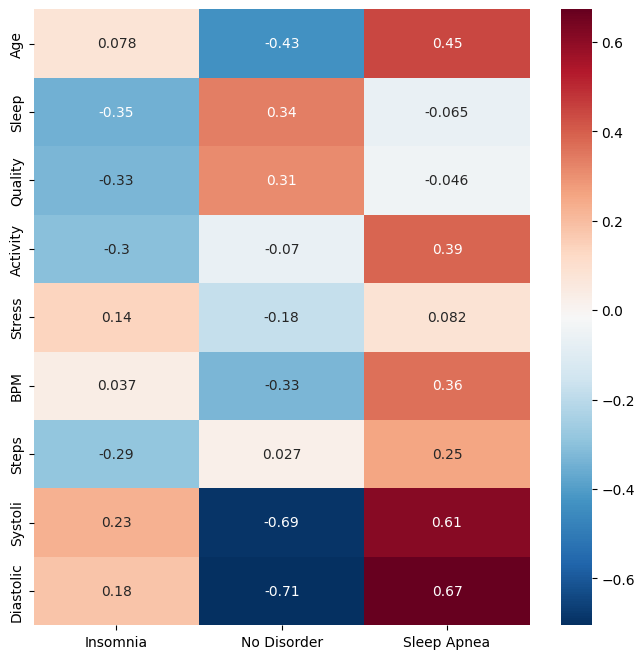

In [18]:
#Make a heatmap, see what variables are connected to which outcome
corr_2 = sleep_disorders.corr(numeric_only = True)
plt.figure(figsize = (8,8))
sns.heatmap(corr_2.iloc[:-3, -3:], annot = True, cmap='RdBu_r');

In [19]:
#First I do a map for the values in Weight then I replace them.
mapping = {"Normal": 1, "Normal Weight" : 1, "Overweight": 2, "Obese": 3}
sleep_disorders["Weight"] = sleep_disorders["Weight"].replace(mapping).astype(int)

<Axes: title={'center': 'Variable BMI Category'}, xlabel='Weight', ylabel='count'>

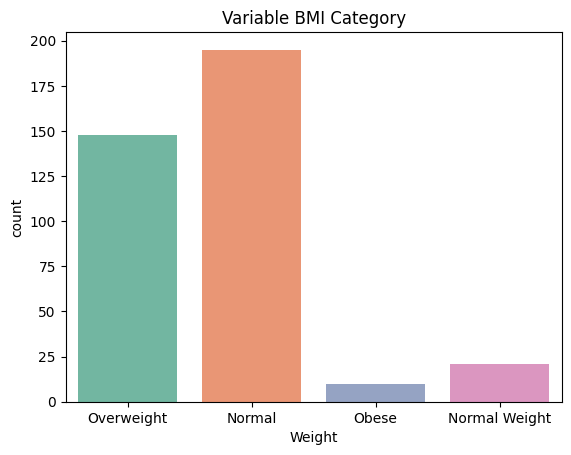

In [20]:
plt.subplot(1, 1, 1)
plt.gca().set_title('Variable BMI Category')
sns.countplot(x = 'Weight', palette = 'Set2', data = df)

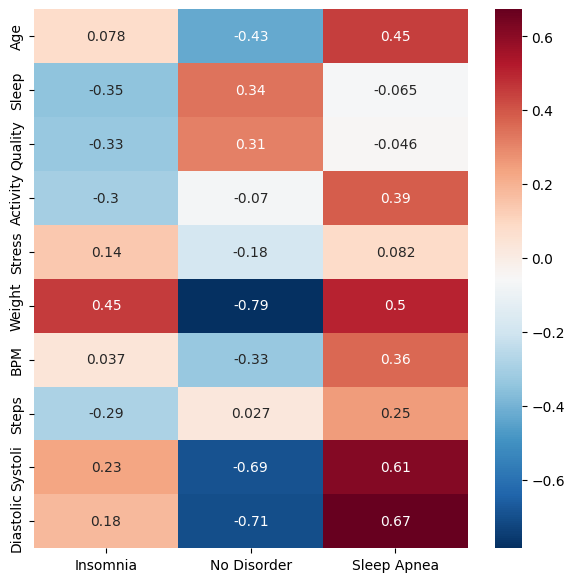

In [21]:
#Hope for a bit clearer result, do the same correlation again with BMI
corr_3 = sleep_disorders.corr(numeric_only = True)
plt.figure(figsize = (7,7))
sns.heatmap(corr_3.iloc[:-3, -3:], annot = True, cmap='RdBu_r');

I have many interesting findings. First of all, I think the real absence of the correlation in this case would be a value closer to the "No Disorder" column.
What I want to have and the "normal" state is without disease, so in real world I want values which are associated with no disorder.
Age is correlated with sleep apnea, but not with insomnia, and could be a good predictor for the absecence of a disease. 
Sleep duration and quality is not affecting sleep apnea so much.But in this case it is clearly visible, that the presence of a  disorder affects the sleep quality and duration negatively, without disorder, these values are higher.


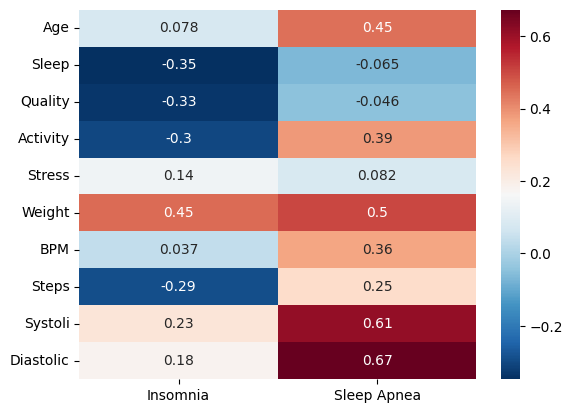

In [22]:
no_normal = sleep_disorders.drop("No Disorder", axis = 1)
correlation_4 = no_normal.corr(numeric_only = True)
sns.heatmap(correlation_4.iloc[:-2, -2:], annot = True, cmap='RdBu_r');

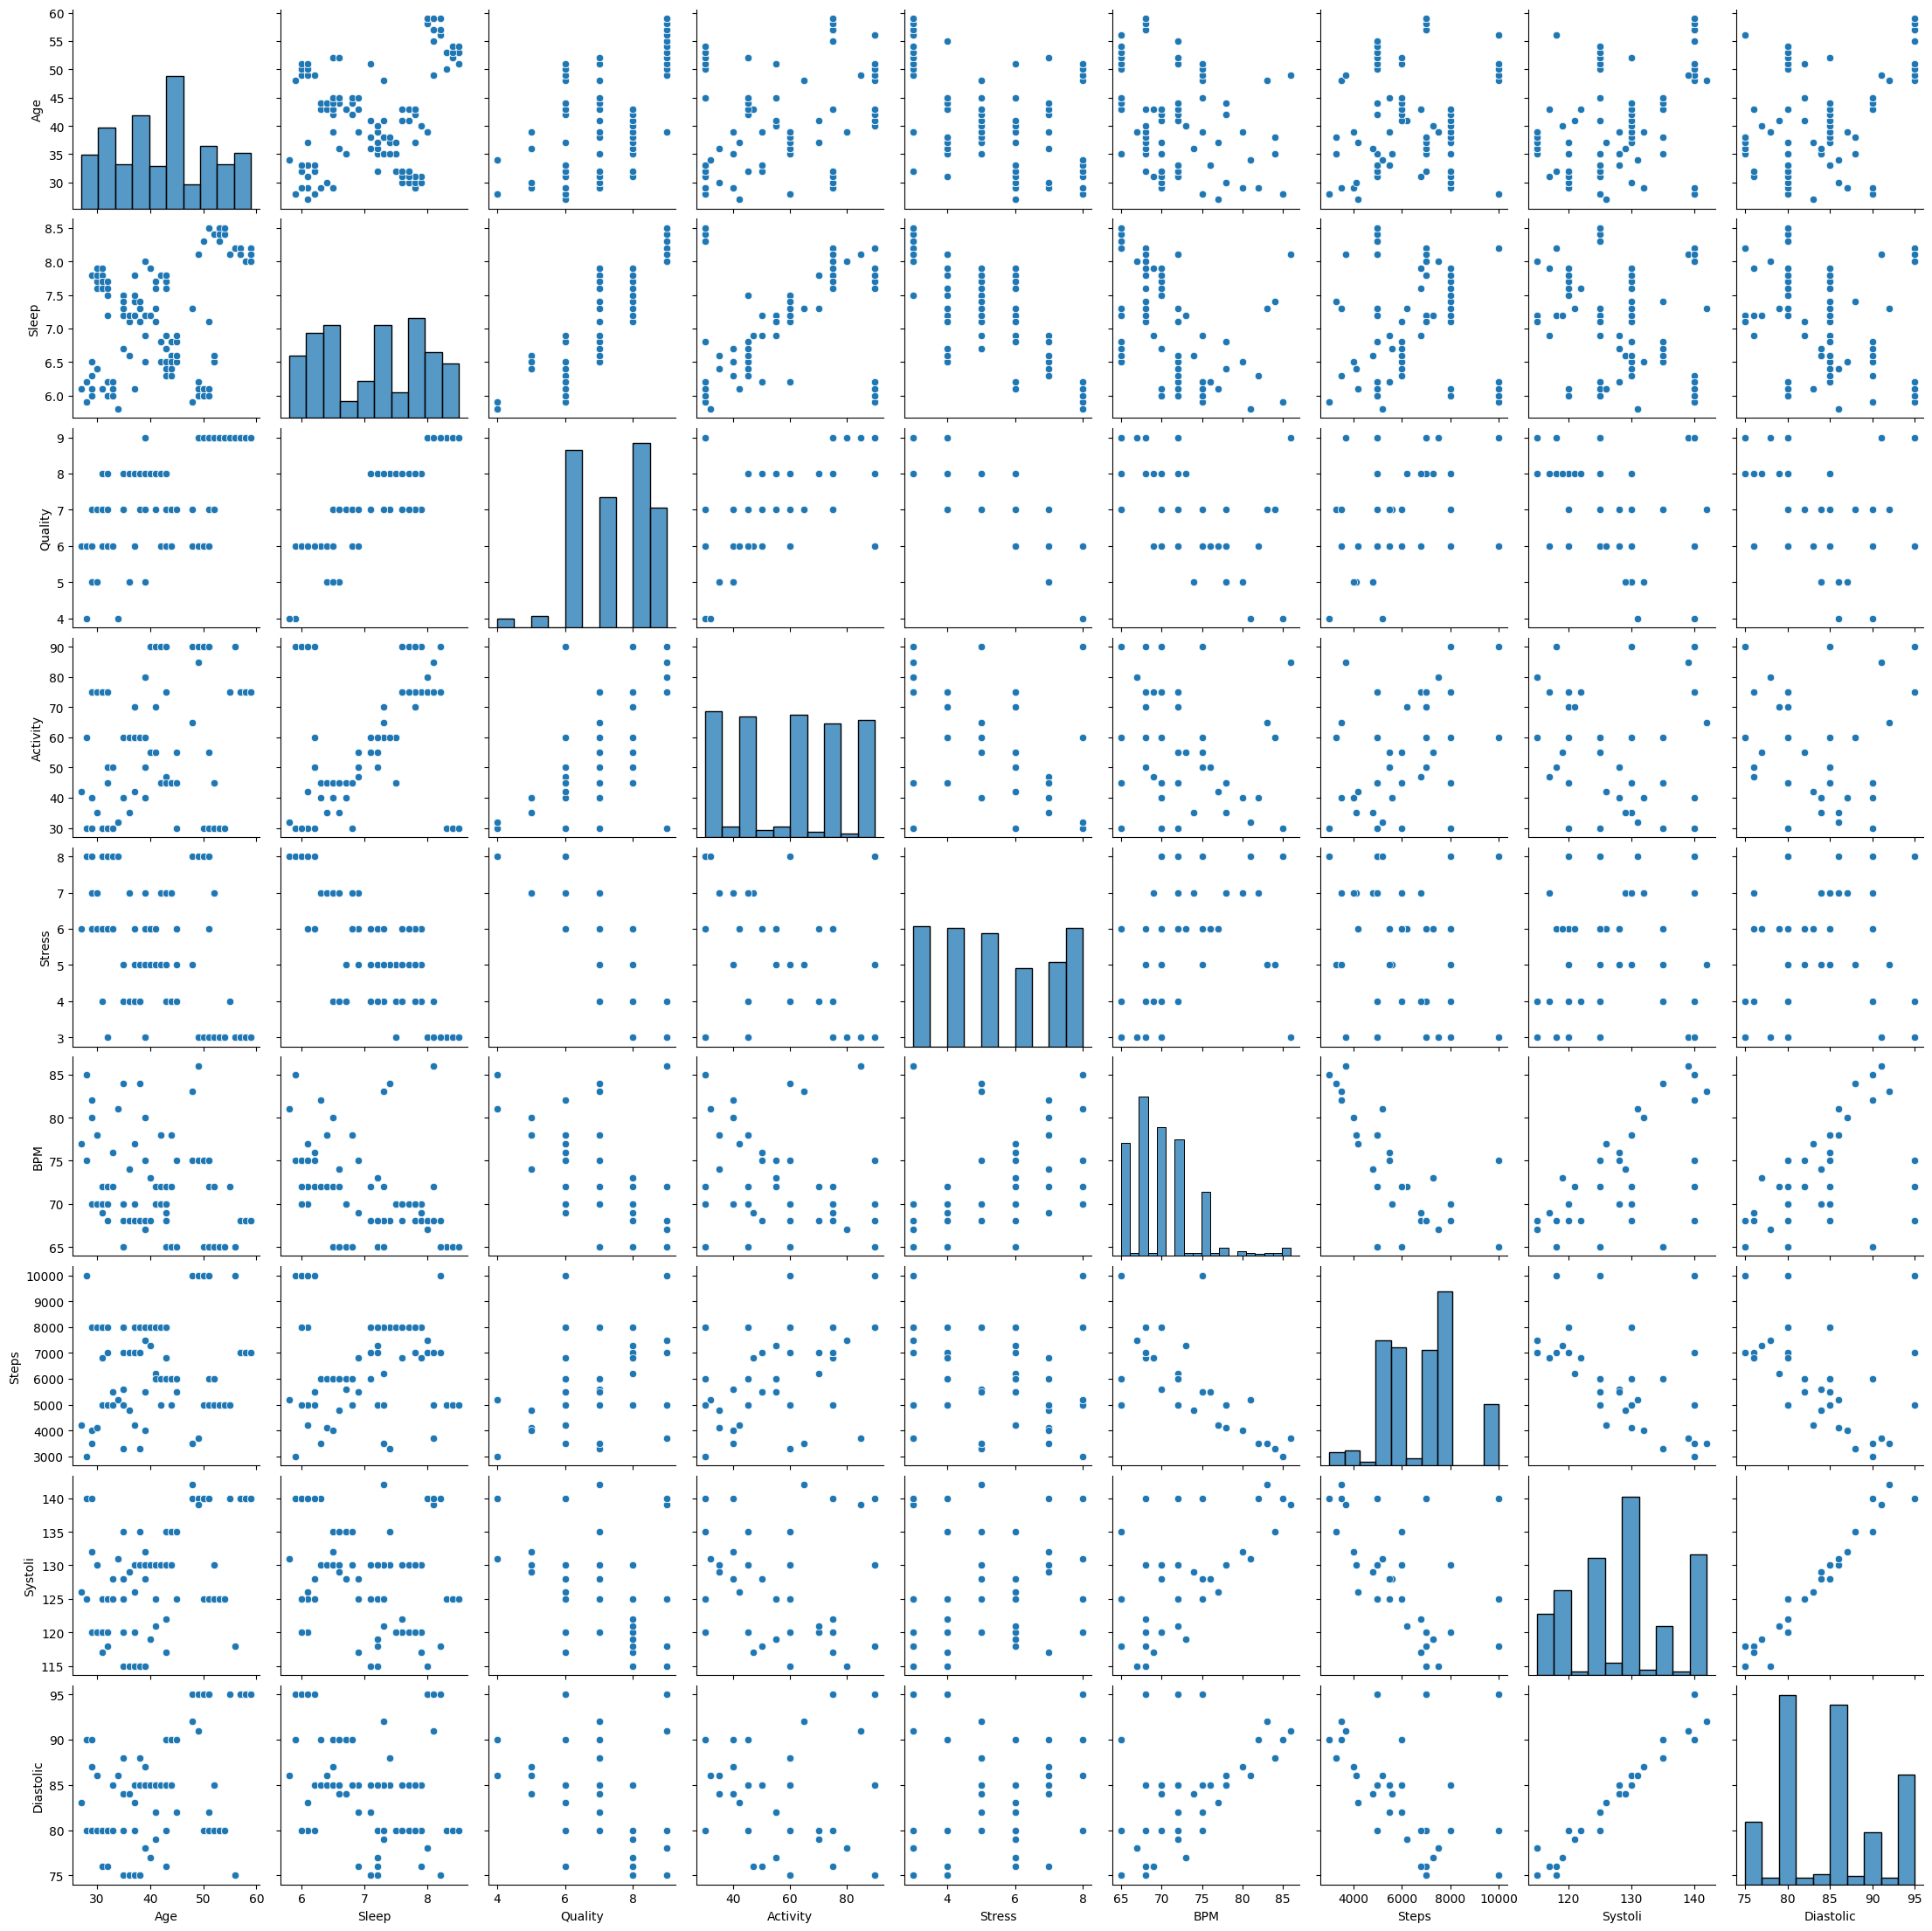

In [23]:
sns.pairplot(df)

Text(0.5, 1.0, 'Sleep Duration VS Quality Of Sleep')

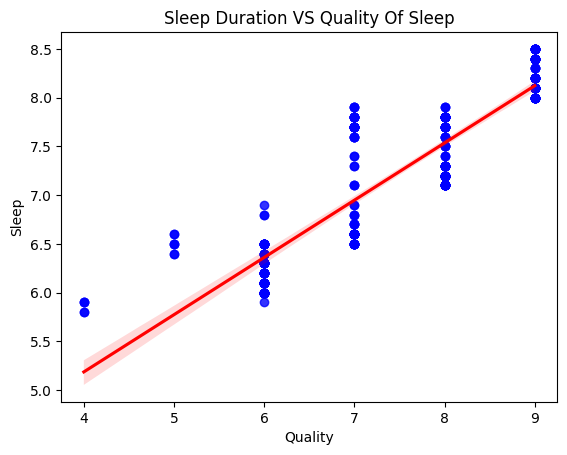

In [24]:
#high positive correlation between Sleep duration and Quality Of Sleep
sns.regplot(x='Quality',y='Sleep',data=df,scatter_kws={'color':'blue'},line_kws={'color':'red'})
plt.title('Sleep Duration VS Quality Of Sleep')

Text(0.5, 1.0, 'Stress Level VS Quality Of Sleep')

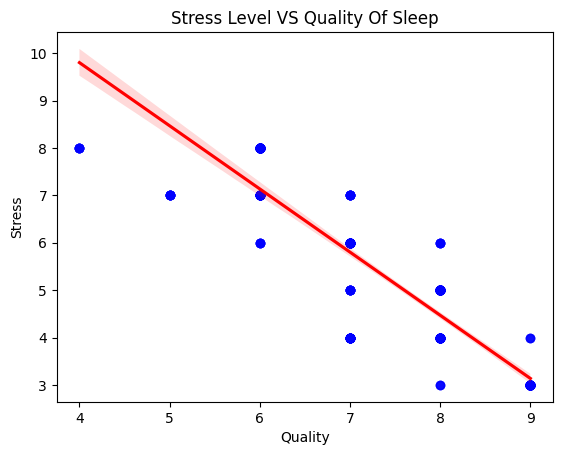

In [25]:
#high negative correlation between Stress level and Quality of Sleep.
sns.regplot(x='Quality',y='Stress',data=df,scatter_kws={'color':'blue'},line_kws={'color':'red'})
plt.title('Stress Level VS Quality Of Sleep')

In [26]:
newdf= df.rename(columns={"Sleep Duration":"Sleep_Duration","Physical Activity Level":"Physical_Activity_Level","Heart Rate":"Heart_Rate","Daily Steps":"Daily_Steps", "Quality of Sleep":"Quality_of_Sleep", "Stress Level":"Stress_Level"})

In [27]:
x= newdf[['Quality','Sleep']]
y=newdf[['Stress']]

x_train, x_test, y_train, y_test= train_test_split(x, y,test_size=0.3, random_state=42)

In [28]:
from statsmodels.formula.api import ols
#OLS METHOD.
ols_data=pd.concat([x_train, y_train], axis =1)
ols_formula= "Stress ~ Quality + Sleep"


OLS = ols(formula = ols_formula, data = ols_data)



model=OLS.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Stress   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     489.1
Date:                Tue, 12 Dec 2023   Prob (F-statistic):           1.65e-88
Time:                        19:02:24   Log-Likelihood:                -312.37
No. Observations:                 261   AIC:                             630.7
Df Residuals:                     258   BIC:                             641.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     15.3484      0.496     30.958      0.000      14.372      16.325
Quality       -1.2875      0.089    -14.410      0.000      -1.463      -1.112
Sleep         -0.0789      0.134     -0.589      0.557      -0.343       0.185
==============================================================================
Omnibus:                       24.284   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.746
Skew:                          -0.809   Prob(JB):                     5.73e-07
Kurtosis:                       3.149   Cond. No.                         106.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
from sklearn.linear_model import LinearRegression

ml=LinearRegression()
ml.fit(x_train,y_train)

#Training model for prediction
y_predict=ml.predict(x_train)

In [30]:
from sklearn.metrics import r2_score
r2_score(y_train, y_predict)

0.7912997569883011

In [31]:
#Predicting Stress level for Quality Of Sleep of 6.6 and Sleep Duration of 5.
ml.predict([[5,6.1]])

array([[8.42963506]])

In [32]:
ml.predict([[9,8]])

array([[3.12975365]])

In [33]:
#Make a train and a test set -again without the occupations
from sklearn.model_selection import train_test_split
y_occ = sleep_disorders[["No Disorder", "Insomnia","Sleep Apnea"]]
X_occ = sleep_disorders.drop(["Insomnia", "No Disorder", "Sleep Apnea", "Blood", "Job", "Gender"], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X_occ, y_occ, test_size = 0.25, random_state = 42)


In [34]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the training data
scaler.fit(X_train)

# Transform the training and test data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
#Seeing the results with a KNN model
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter grid
param_grid = {'n_neighbors': [1, 3, 5, 6, 7, 9, 11],
              'weights': ['uniform', 'distance']}
# Create a KNN classifier object
knn = KNeighborsClassifier()

In [36]:

        
# Create a GridSearchCV object
grid_search = GridSearchCV(knn, param_grid, cv=5)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train_scaled, y_train)
 
    #Print the best hyperparameters
print(grid_search.best_params_)
# Train the classifier using your training data
knn.fit(X_train_scaled, y_train)

# Make predictions on your test data
y_pred = knn.predict(X_test_scaled)





{'n_neighbors': 7, 'weights': 'uniform'}


In [37]:
from sklearn import metrics
result = metrics.accuracy_score(y_pred,y_test)
print(result)
classification_rep = metrics.classification_report(y_test, y_pred)
print(classification_rep)

0.8936170212765957
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.70      0.82      0.76        17
           2       0.89      0.73      0.80        22

   micro avg       0.89      0.89      0.89        94
   macro avg       0.85      0.84      0.84        94
weighted avg       0.90      0.89      0.89        94
 samples avg       0.89      0.89      0.89        94



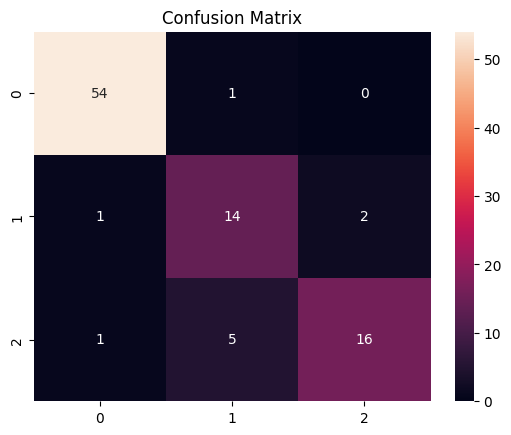

In [38]:
#Create the labels for the matrix
disease_labels = ["Insomnia", "No Disorder", "Sleep Apnea"] 
#Create a confusion matrix
cm = metrics.confusion_matrix(np.asarray(y_test).argmax(axis=1), np.asarray(y_pred).argmax(axis=1))
# Create a figure object
fig = plt.figure()
# Add an ax object to the figure
ax = plt.subplot(111)
#Create the visualisation
ax.set_xlabel("Predicted labels")
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix'); 
sns.heatmap(cm, annot=True, fmt='g');

In [39]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [1,2,3, 4, 5, 6, 7, 8, 9, 10]
}
# Create a grid search object
grid_search = GridSearchCV(clf, param_grid, cv=5)
# Fit the grid search object to the data
grid_search.fit(X_train, y_train)
y_pred = grid_search.predict(X_test)

In [40]:
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
report = metrics.classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

Accuracy: 0.9148936170212766
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.78      0.82      0.80        17
           2       0.90      0.82      0.86        22

   micro avg       0.91      0.91      0.91        94
   macro avg       0.88      0.87      0.88        94
weighted avg       0.92      0.91      0.91        94
 samples avg       0.91      0.91      0.91        94



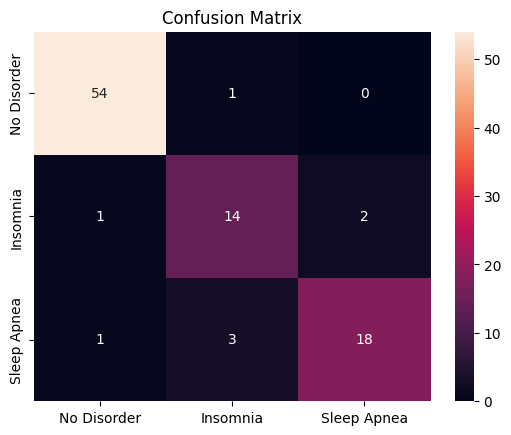

In [41]:
#Create the labels for the matrix
disease_labels = ["No Disorder", "Insomnia",  "Sleep Apnea"] 
#Create a confusion matrix
cm = metrics.confusion_matrix(np.asarray(y_test).argmax(axis=1), np.asarray(y_pred).argmax(axis=1))
# Create a figure object
fig = plt.figure()
# Add an ax object to the figure
ax = plt.subplot(111)
#Create the visualisation
ax.set_title("Confusion Matrix"); 
sns.heatmap(cm, annot = True, fmt = "g", xticklabels=disease_labels, yticklabels=disease_labels);